# Modeling

## Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  lightgbm import LGBMRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.metrics import r2_score
from math import sqrt, pow
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
# from tensorflow import keras
# from scikeras.wrappers import KerasRegressor
# check xgboost version
import time
import os

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:

#Exp 1
# train_df_sprit=pd.read_csv("../data/preprocessed/train_converted.csv", index_col=0)
# test_df_sprit=pd.read_csv("../data/preprocessed/test_converted.csv", index_col=0)
# train_data=train_df.copy()
# test_data=test_df.copy()

#Experiment 3
train_df_sprit=pd.read_csv("../data/preprocessed/df_range_consumption_train_data.csv", index_col=0)
test_df_sprit=pd.read_csv("../data/preprocessed/df_range_consumption_test_data.csv", index_col=0)
# train_df_sprit=pd.read_csv("../data/preprocessed/sprit_train_data.csv", index_col=0)
# test_df_sprit=pd.read_csv("../data/preprocessed/sprit_train_data.csv", index_col=0)
train_data=train_df_sprit.copy()
test_data=test_df_sprit.copy()

In [3]:
train_data.dropna(axis=0, inplace=True)
test_data.dropna(axis=0, inplace=True)

In [4]:
train_data.isna().sum()

power(kW)                 0
quantity(kWh)             0
odometer                  0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
ecr_deviation             0
trip_distance(km)         0
month                     0
weekday                   0
day                       0
dtype: int64

In [45]:
test_data.isna().sum()

power(kW)                 0
quantity(kWh)             0
odometer                  0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
ecr_deviation             0
trip_distance(km)         0
month                     0
weekday                   0
day                       0
dtype: int64

In [10]:
print(train_data.shape)
print(test_data.shape)

(8920, 16)
(5944, 16)


In [47]:
# #X_train=data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
# X_train=train_df.drop(columns=['trip_distance(km)','avg_speed(km/h)'],axis=1)
# y_train=train_df['trip_distance(km)']
# #X_test=test_data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
# X_test=test_df.drop(columns=['trip_distance(km)','avg_speed(km/h)'],axis=1)
# y_test=test_df['trip_distance(km)']

In [11]:
#X_train=data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
X_train_sprit=train_df_sprit.drop(columns=['trip_distance(km)'],axis=1)
y_train_sprit=train_df_sprit['trip_distance(km)']
#X_test=test_data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
X_test_sprit=test_df_sprit.drop(columns=['trip_distance(km)'],axis=1)
y_test_sprit=test_df_sprit['trip_distance(km)']

In [12]:
X_train_sprit.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,month,weekday,day
17707,35.0,7.80,37684.0,2.0,1,1,1,1.0,18.57,0,1,6.07,2,2,11
14674,49.0,6.50,1246.0,3.0,0,1,0,1.0,11.43,1,0,-1.07,8,5,24
6991,85.0,11.90,42585.0,2.0,0,1,1,3.0,16.90,0,1,4.20,2,4,16
22335,278.0,13.00,112493.0,2.0,1,0,0,1.0,23.99,0,0,7.89,2,4,14
8352,49.0,5.02,131256.0,3.0,0,0,1,1.0,11.39,0,0,-2.11,4,4,28


In [13]:
X_test_sprit.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,month,weekday,day
14428,49.0,8.01,50388.0,3.0,0,0,1,3.0,13.38,0,0,0.88,10,4,8
18414,35.0,8.20,58382.0,2.0,1,1,1,1.0,19.52,0,1,7.02,12,1,1
14759,49.0,7.03,6918.0,2.0,1,0,1,1.0,14.26,0,0,1.76,11,0,18
19458,35.0,6.00,169070.0,2.0,1,1,1,1.0,14.29,0,1,1.79,11,0,9
13898,49.0,7.70,73626.0,3.0,1,0,1,1.0,14.04,0,0,1.54,10,0,3


# Machine Learning 

In [17]:
import os

### Evaluation Methods

In [4]:
def plotresults(y_test, y_pred_test, tittle):
    x_axis=range(len(y_test))
    plt.figure(figsize=(5,5))
    plt.plot(x_axis, y_test, linewidth=1, label="Actual Values" )
    plt.plot(x_axis, y_pred_test, linewidth=1.1, label="Predicted Values")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xlabel('Number of Trips', weight='bold', size=8)
    plt.ylabel('Trip Distance', weight='bold',size=8)
    plt.title(tittle,weight='bold',size=10)
    plt.xticks(weight='bold', size=7)
    plt.yticks(weight='bold', size=7)
    plt.grid(True)
    plt.show()

In [5]:

def calulate_metrics(y_test, y_pred_test):
    mse=  format(mean_squared_error(np.array(y_test), y_pred_test, squared=False),'.4f')
    rmse = format(np.sqrt(mean_squared_error(np.array(y_test), y_pred_test, squared=False)), '.4f')
    mae= format(mean_absolute_error(np.array(y_test), y_pred_test),'.4f')
    r2=format(r2_score(y_test,y_pred_test),'.4f')
    return mse, rmse, mae, r2


In [6]:
def evaluate_metrics(y_test, X_test,regressor_model, tittle, timetaken):
    y_pred_test=regressor_model.predict(X_test)
    mse, rmse,mae,r2=calulate_metrics(np.round(y_test,6), np.round(y_pred_test,6))
    print('Y pred Mean',round(y_pred_test.mean(),6))
    print('MSE',mse)
    print('RMSE', rmse)
    print('MAE', mae)
    print('R2',r2)
    print('timetaken', timetaken)

    results={}
    results['Model Name']=tittle
    results['Y Mean']=y_test.mean()
    results['Y Pred Mean']=y_pred_test.mean()
    results['MSE']=mse
    results['RMSE']=rmse
    results['MAE']=mae
    results['R2']=r2
    results['Excution Time']=timetaken
  

    
    path="../reports/results_032023.xlsx"
    res_new=pd.DataFrame(results, index=[0])
    
     # read file 
    if os.path.exists(path):
        res_old=pd.read_excel(path)
        if res_old.shape[0]>=0:
            print('file exists')
            print("shape before",res_old.shape)
            new_df=pd.concat([res_old,res_new])
            print("shape after",new_df.shape)
            new_df.to_excel(path,header=True,index=False)

    else:
        res_new.to_excel(path,header=True,index=False)
    plotresults(y_test, y_pred_test, tittle)
    return y_pred_test

In [7]:
def DistributionPlot(y_test, y_pred, Title):
    plt.figure(figsize=(4, 4))
    ax1 = sns.distplot(y_test, label='Actual values',hist=False )
    ax2 = sns.distplot(y_pred,  label='Predicted Values',hist=False)
    plt.title(Title,weight='bold', size=10)
    plt.xlabel('Trip Distance', weight='bold', size=8)
    plt.ylabel('Density',weight='bold', size=8)
    plt.xticks( weight='bold', size=7)
    plt.yticks( weight='bold', size=7)
    plt.legend()
    plt.show()
    plt.close()

## Decission Tree 


### Base model 

In [8]:
def decisionTree(X_train, y_train, X_test, y_test):
    start_time = time.time()
    dectreeRegModel=DecisionTreeRegressor()
    dectreeRegModel.fit(pd.DataFrame(X_train), np.ravel(y_train))
    timetaken=(time.time() - start_time)
    y_pred_deci=evaluate_metrics(y_test,X_test, dectreeRegModel, 'Base Decission Tree results',timetaken)
    #export_graphviz(dectreeRegModel, out_file ='../reports/tree_structure.dot', 
       #        feature_names =X_train_sprit.columns)
    return dectreeRegModel, y_test_sprit,y_pred_deci
    

In [12]:
print('y_test_sprit',round(y_test_sprit.mean(),6))

y_test_sprit 72.615276


Y pred Mean 73.363694
MSE 35.5837
RMSE 5.9652
MAE 17.1305
R2 0.5346
timetaken 0.11811709403991699
file exists
shape before (5, 8)
shape after (6, 8)


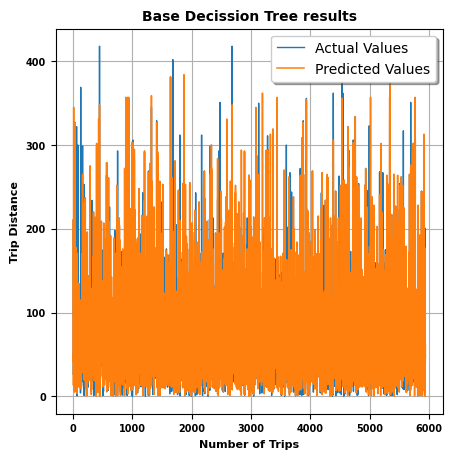

In [13]:
dectreeRegModel,y_test_sprit, y_pred_deci=decisionTree(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

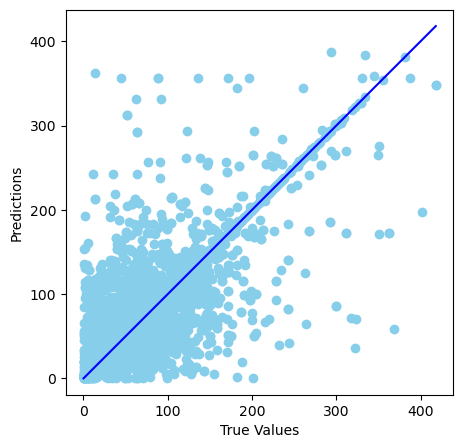

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(y_test_sprit, y_pred_deci, c='skyblue')
# plt.yscale('log')
# plt.xscale('log')
p1 = max(max(y_pred_deci), max(y_test_sprit))
p2 = min(min(y_pred_deci), min(y_test_sprit))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')
DistributionPlot(y_test_sprit, y_pred_deci, 'Decission Tree Base Model Results')

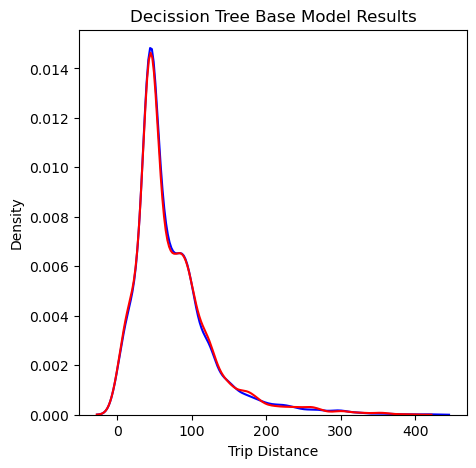

In [25]:
DistributionPlot(y_test_sprit, y_pred_deci, 'Decission Tree Base Model Results')

### Tuning parameters

In [26]:
pd.set_option('display.max_rows', 10)
def runTunedDecFor(X_train, y_train, X_test, y_test):
    params_grid={
            'max_depth':[ i for i in range(1,10)],
            'min_samples_leaf': [ i for i in range(1,8)],
            'min_samples_split': [ i for i in range(2,10)],
            'criterion': ['squared_error','absolute_error'],
            'splitter':['best', 'random'],
            'max_features':['sqrt','log2']}
    
    
    skfold= StratifiedKFold(n_splits=5, shuffle=True)
    start_time = time.time()
    dec_cv=DecisionTreeRegressor()
    dec_random = RandomizedSearchCV(estimator = dec_cv, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    #rf_random.fit(pca_train[:,:6],np.ravel(y_train))
    dec_random.fit(X_train,np.ravel(y_train))
    endtime= time.time()-start_time
    y_pred=evaluate_metrics(y_test,X_test,dec_random, 'Tuned DecisionTree',endtime)
    return dec_random, y_test, y_pred

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, min_samples_leaf=7, min

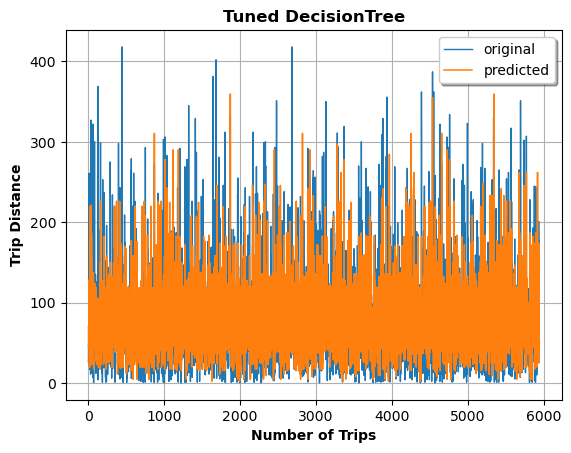

In [33]:
dec_random,y_test, y_pred=runTunedDecFor(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [47]:
dec_random.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'squared_error'}

In [67]:
pd.set_option('display.max_columns', 30)

In [68]:
dec_random.best_params_
cv_res=pd.DataFrame(dec_random.cv_results_)
cv_res[cv_res.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.011724,0.001348,0.002544,0.000322,best,9,1,sqrt,8,squared_error,"{'splitter': 'best', 'min_samples_split': 9, '...",0.455163,0.482295,0.386755,0.39848,0.462727,0.437084,0.037554,1


In [10]:
# import matplotlib.pyplot as plt2
# from sklearn.tree import plot_tree

# plot_tree(dectreeRegModel, 
#            feature_names=X_train_sprit.columns)
# plt.show()

In [ ]:
# X_test_pc = pca.transform(scalled_X_test)

## Random Forest

### 1.Base Model

In [15]:
# rf=RandomForestRegressor(n_estimators=1000)
# rf_model=rf.fit(pca_train[:,:6],np.ravel(y_train))
def runRandonForest(X_train, y_train, X_test, y_test):
    start_time = time.time()
    rf=RandomForestRegressor(n_estimators=100)
    rf_model=rf.fit(X_train,np.ravel(y_train))
    timetaken=  time.time()-start_time
    y_pred_rf_base=evaluate_metrics(y_test,X_test,rf_model, 'Base RandomForest results',timetaken)
    return rf_model,y_pred_rf_base

In [37]:
#runRandonForest(X_kmeans_train_0, y_kmeans_train_0, X_kmeans_test_0, y_kmeans_test_0)
#runRandonForest(scalled_X_train, y_train_sprit, scalled_X_test, y_test_sprit)

In [ ]:
#runRandonForest(X_kmeans_train_1, y_kmeans_train_1, X_kmeans_test_1, y_kmeans_test_1)

Y pred Mean 72.65198
MSE 27.3687
RMSE 5.2315
MAE 14.3751
R2 0.7247
timetaken 3.306752920150757
file exists
shape before (6, 8)
shape after (7, 8)


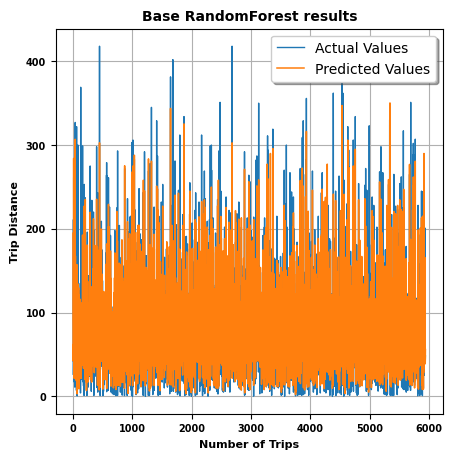

In [16]:
rf_model,y_pred_rf_base=runRandonForest(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [ ]:
# def plotresultsbar(y_test,y_pred_test):
#     fig1=plt.figure(figsize=(5,4))
#     plt.bar(X_test['power(kW)'],y_test, color='red', label='y_test')
#     plt.bar(X_test['power(kW)'],y_pred_test, color='blue', label='y_pred_test')
#     plt.ylim([0,500])
#     plt.xlabel('power')
#     plt.ylabel('Range')
#     plt.title(' Range versus power')
#     plt.show()


In [ ]:
# def plotlinegraph(y_test, y_pred_test):
#     fig1=plt.figure(figsize=(5,4))
#     sns.lineplot(x=X_test['power(kW)'],y=y_test, color='red', label='y_test')
#     sns.lineplot(x=X_test['power(kW)'],y=y_pred_test, color='blue', label='y_pred_test')
#     plt.ylim([0,500])
#     plt.xlabel('power')
#     plt.ylabel('Range')
#     plt.title(' Range versus power')
#     plt.show()


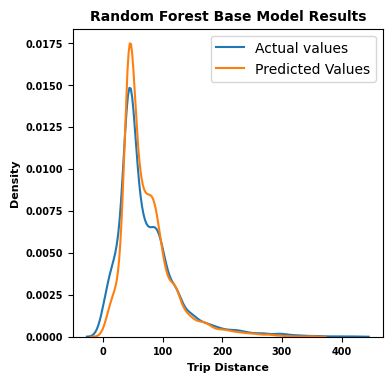

In [17]:
import warnings
warnings.filterwarnings('ignore')
DistributionPlot(y_test_sprit, y_pred_rf_base, 'Random Forest Base Model Results')

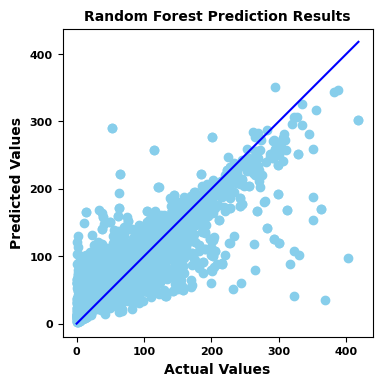

In [18]:
plt.figure(figsize=(4,4))
plt.scatter(y_test_sprit, y_pred_rf_base, c='skyblue')
# plt.yscale('log')
# plt.xscale('log')
p1 = max(max(y_pred_rf_base), max(y_test_sprit))
p2 = min(min(y_pred_rf_base), min(y_test_sprit))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Random Forest Prediction Results', fontsize=10, weight='bold')
plt.xlabel('Actual Values', fontsize=10, weight='bold')
plt.ylabel('Predicted Values', fontsize=10,weight='bold')
plt.xticks( fontsize=8, weight='bold')
plt.yticks( fontsize=8, weight='bold')
plt.axis('equal')
plt.show()

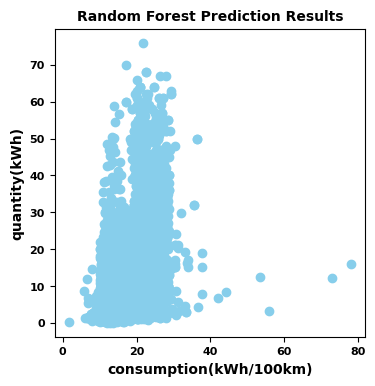

In [30]:
plt.figure(figsize=(4,4))
plt.scatter( X_train_sprit['consumption(kWh/100km)'],X_train_sprit['quantity(kWh)'], c='skyblue',hue='tire_tpe')
plt.title('Random Forest Prediction Results', fontsize=10, weight='bold')
plt.ylabel('quantity(kWh)', fontsize=10, weight='bold')
plt.xlabel('consumption(kWh/100km)', fontsize=10,weight='bold')
plt.xticks( fontsize=8, weight='bold')
plt.yticks( fontsize=8, weight='bold')
plt.axis('equal')
plt.show()

In [35]:
X_train_sprit.columns

Index(['power(kW)', 'quantity(kWh)', 'odometer', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'ecr_deviation', 'month', 'weekday', 'day'],
      dtype='object')

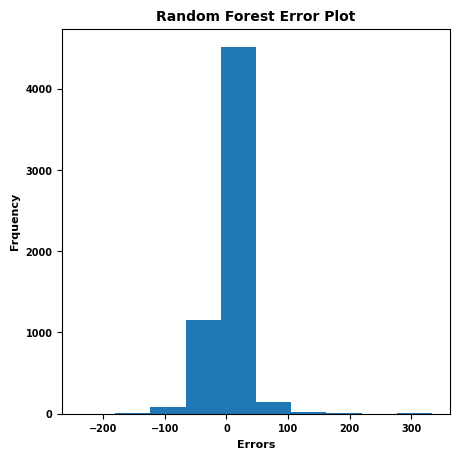

In [19]:
plt.figure(figsize=(5,5))
plt.hist((y_test_sprit - y_pred_rf_base))
plt.title('Random Forest Error Plot', size=10, weight='bold')
plt.xlabel('Errors', size=8, weight='bold')
plt.ylabel('Frquency', size=8,weight='bold')
plt.xticks( size=7, weight='bold')
plt.yticks( size=7, weight='bold')
plt.show()

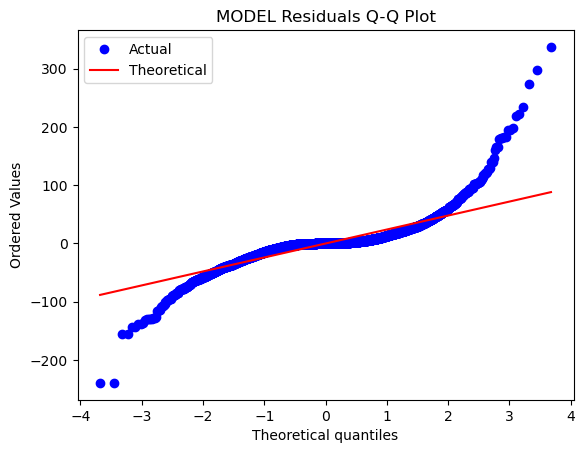

In [51]:
#Import library
from scipy import stats
stats.probplot((y_test_sprit - y_pred_rf_base), dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

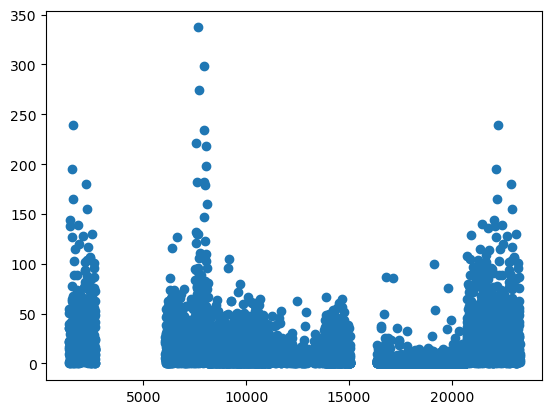

In [54]:
plt.plot(np.abs(y_test_sprit - y_pred_rf_base) ,marker='o',linestyle='')

<BarContainer object of 15 artists>

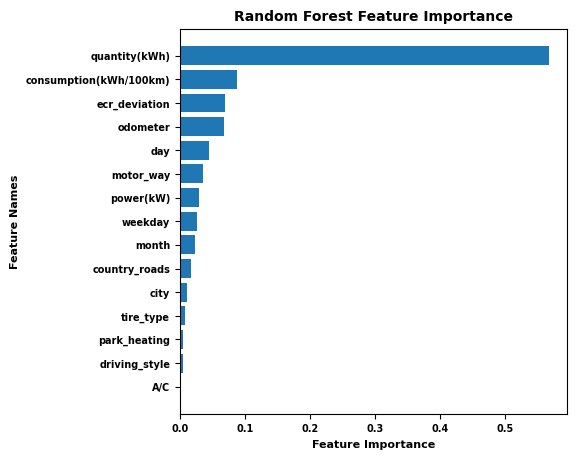

In [26]:
plt.figure(figsize=(5,5))
plt.title('Random Forest Feature Importance', weight='bold', size=10)
plt.xlabel('Feature Importance', weight='bold', size=8)
plt.ylabel("Feature Names", weight='bold', size=8)
plt.xticks(weight='bold', size=7)
plt.yticks(weight='bold', size=7)
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X_train_sprit.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])


###  Tuned Random Forest

In [48]:
pd.set_option('display.max_rows', 10)
rf_cv=RandomForestRegressor()
skfold= StratifiedKFold(n_splits=5, shuffle=True)

In [64]:
def runTunedRanFor(X_train, y_train, X_test, y_test):
    params_grid={
            'n_estimators': [i for i in range(1,150)],
            'bootstrap': [True, False],
            'max_depth':[ i for i in range(1,14)],
            'min_samples_leaf': [ i for i in range(1,10)],
            'min_samples_split': [ i for i in range(2,10)],
            'criterion': ['squared_error'] }
    start_time=time.time()
    rf_cv=RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf_cv, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    #rf_random.fit(pca_train[:,:6],np.ravel(y_train))
    rf_model=rf_random.fit(X_train,np.ravel(y_train))
    timetaken=time.time()-start_time
    y_prd=evaluate_metrics(y_test,X_test,rf_model, 'RandomForest Tree results',timetaken)
    return rf_model, y_test, y_prd

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=True, criterion=squared_error, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   2.0s
[CV] END bootstrap=True, criterion=squared_error, max_depth=12, min_samples_leaf=4, mi

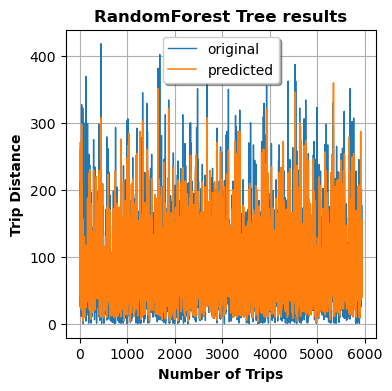

In [50]:
#runTunedRanFor(X_kmeans_train, y_kmeans_train, X_kmeans_test, y_kmeans_test)
rf_model,y_test, y_prd=runTunedRanFor(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [56]:
rf_model.best_params_

{'n_estimators': 127,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_depth': 12,
 'criterion': 'squared_error',
 'bootstrap': True}

In [58]:
cv_res=pd.DataFrame(rf_model.cv_results_)
cv_res[cv_res.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,3.86047,0.052482,0.043355,0.002774,127,3,6,12,squared_error,True,"{'n_estimators': 127, 'min_samples_split': 3, ...",0.555246,0.566016,0.594533,0.593663,0.627007,0.587293,0.025099,1


/tmp/ipykernel_2497370/747647932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, color="b", label='Actual values',hist=False )
/tmp/ipykernel_2497370/747647932.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(y_pred, color="r", label='Predicted Values

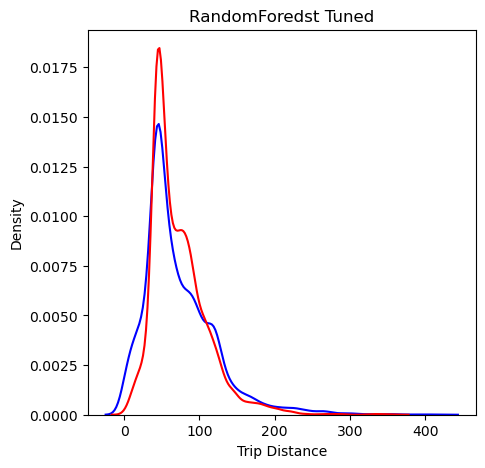

In [34]:
DistributionPlot(y_test_sprit, y_prd, 'RandomForedst Tuned')

## XGBoost

### Basic Model 

In [51]:
params = {
            'objective':'reg:squarederror',

        }  

In [65]:
def runXGboost(X_train, y_train, X_test, y_test):  
    # Instantiation
    start_time = time.time()
    params = {'objective':'reg:squarederror' } 
    xgb_r = xgb.XGBRegressor(**params)
    # Fitting the model
    #xgb_r.fit(pca_train[:,:6],np.ravel(y_train))
    xgb_r.fit(X_train,np.ravel(y_train))
    timetaken= start_time - time.time()
    evaluate_metrics(y_test,X_test,xgb_r,'Base XGB Analysis',timetaken)
    return xgb_r

Y pred Mean 72.71182
MSE 28.9571
RMSE 5.3812
MAE 16.0505
R2 0.6918
timetaken -0.40156102180480957
file exists
shape before (10, 8)
shape after (11, 8)


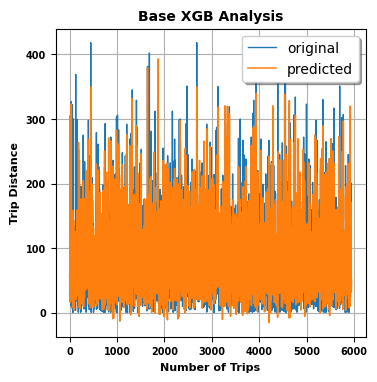

In [66]:
xgb_r=runXGboost(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)


### 2. Tuning Params 

In [69]:
def tunedXGBoost(X_train, y_train, X_test, y_tets):
    skf = StratifiedKFold(n_splits=5,
                        shuffle=True, 
                        random_state=0)
    space={   
        'objective':['reg:squarederror'],
        'max_depth': [1, 2,3,4,5,6,7,8,9,10],
        'n_estimators': [i for i in range(1,200)],
            'learning_rate':[0.01,0.1, 1.0] ,
            'subsample':[0.5,.6,.7,0.8],  
            'eta':[0.1],
            'lambda':[0.01],
            'booster':['gbtree']
        }
    start_time=time.time()
    xgb_r_tun = xgb.XGBRegressor( )
    xgb_cv = RandomizedSearchCV(estimator=xgb_r_tun,param_distributions=space, cv=5,n_iter=100)
    #xgb_cv=xgb_cv.fit(pca_train[:,:6], y_train)
    xgb_cv.fit(X_train, y_train)
    timetaken=  time.time()-start_time
    y_pred_test=evaluate_metrics(y_test_sprit,X_test_sprit,xgb_cv,'XGB Tuned',timetaken )
    return xgb_cv,y_test_sprit,y_pred_test

Y pred Mean 72.61838
MSE 27.9818
RMSE 5.2898
MAE 14.6817
R2 0.7122
timetaken 216.58728075027466
file exists
shape before (12, 8)
shape after (13, 8)


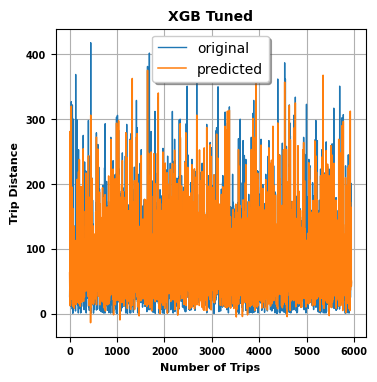

In [70]:
xgb_cv,y_test_sprit,y_pred_test=tunedXGBoost(X_train_sprit, y_train_sprit, y_test_sprit, X_test_sprit)

In [71]:
xgb_cv.best_params_


{'subsample': 0.6,
 'objective': 'reg:squarederror',
 'n_estimators': 107,
 'max_depth': 10,
 'learning_rate': 0.1,
 'lambda': 0.01,
 'eta': 0.1,
 'booster': 'gbtree'}

In [72]:
xgv_cv_res=pd.DataFrame(xgb_cv.cv_results_)
xgv_cv_res[xgv_cv_res.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_objective,param_n_estimators,param_max_depth,param_learning_rate,param_lambda,...,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
87,0.921691,0.080267,0.004328,0.000035,0.6,reg:squarederror,107,10,0.1,0.01,...,gbtree,"{'subsample': 0.6, 'objective': 'reg:squareder...",0.736663,0.70484,0.695167,0.678099,0.669293,0.696813,0.023506,1


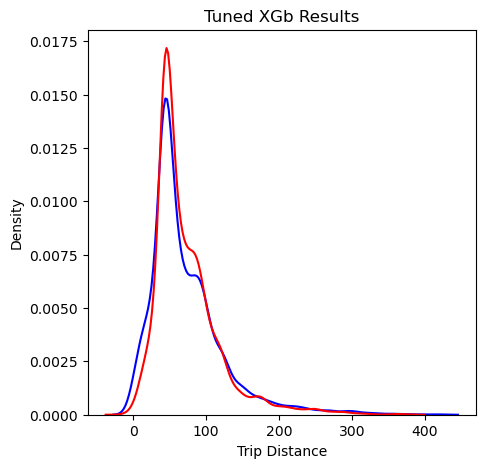

In [73]:
DistributionPlot(y_test_sprit, y_pred_test, 'Tuned XGb Results')

In [ ]:
# def report_performance(optimizer, X, y, title="model"):
#     start = time()
#     optimizer.fit(X, y)
        
#     d=pd.DataFrame(optimizer.cv_results_)
#     best_score = optimizer.best_score_
#     best_score_std = d.iloc[optimizer.best_index_].std_test_score
#     best_params = optimizer.best_params_
#     print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
#            + u"\u00B1"+" %.3f") % (time() - start, 
#                                    len(optimizer.cv_results_['params']),
#                                    best_score,
#                                    best_score_std))    
#     print('Best parameters:')
#     print()
#     return best_params

In [ ]:
score=pd.DataFrame(xgb_cv.cv_results_).query('rank_test_score==1')

In [ ]:
score

In [ ]:
evaluate_metrics(y_test, X_test_pc, xgb_cv.best_estimator_, 'XGB Tuned results')

In [ ]:
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 5000)
        

In [ ]:
# from bayes_opt import BayesianOptimization
# # Gradient Boosting Machine
# def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators, subsample):
#     params_gbm = {}
#     params_gbm['max_depth'] = round(max_depth)
#     params_gbm['max_features'] = max_features
#     params_gbm['learning_rate'] = learning_rate
#     params_gbm['n_estimators'] = round(n_estimators)
#     params_gbm['subsample'] = subsample
#     xgb_r = xgb.XGBRegressor( objective='reg:squarederror', )
#     scores = cross_val_score(GradientBoostingClassifier(random_state=123, **params_gbm),
#                              X_train, y_train, scoring=acc_score, cv=5).mean()
#     score = scores.mean()
#     return score
# # Run Bayesian Optimization
# start = time.time()
# params_gbm ={
#     'max_depth':(3, 10),
#     'max_features':(0.8, 1),
#     'learning_rate':(0.01, 1),
#     'n_estimators':(80, 150),
#     'subsample': (0.8, 1)
# }
# gbm_bo = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=111)
# gbm_bo.maximize(init_points=20, n_iter=4)
# print('It takes %s minutes' % ((time.time() - start)/60))

## Light GBM 

In [67]:
def runLightGBM(X_train, y_train, X_test, y_test):
    starttime=time.time()
    lgbm_model=LGBMRegressor( objective = "regression")
    #lgbm_model.fit(pca_train[:,:6],np.ravel(y_train))
    lgbm_model.fit(X_train,np.ravel(y_train))
    timetaken= time.time()-starttime
    evaluate_metrics(y_test, X_test, lgbm_model, 'Base LightGBM Results',timetaken)

Y pred Mean 72.47335
MSE 29.3171
RMSE 5.4145
MAE 16.3346
R2 0.6841
timetaken 0.13575959205627441
file exists
shape before (11, 8)
shape after (12, 8)


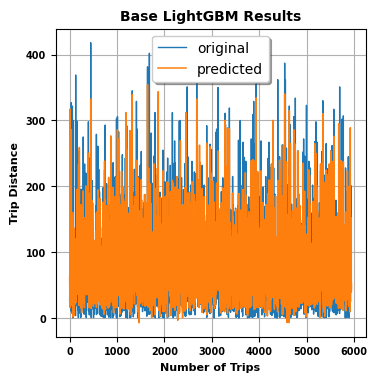

In [68]:
runLightGBM(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [ ]:
runLightGBM(X_kmeans_train_0, y_kmeans_train_0, X_kmeans_test_0, y_kmeans_test_0)

In [ ]:
runLightGBM(X_kmeans_train_0, y_kmeans_train_0, X_kmeans_test_0, y_kmeans_test_0)

In [ ]:
runLightGBM(X_kmeans_train_1, y_kmeans_train_1, X_kmeans_test_1, y_kmeans_test_1)

In [ ]:
lgbm_model.get_params()

### Tune Light GBM

In [74]:
def tunedLightGBM(X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5,
                        shuffle=True, 
                        random_state=0)
    
    space = {
        "objective" : ["regression"],
        "metric" :[ "mse"],
        'boosting_type': ['gbdt'],
      
         "max_depth": [5, 6,7, 8],
         "learning_rate" : [0.005, 0.01, 0.02, 0.1],
        'min_child_samples': [2,5,10,20],
        'n_estimators': [i for i in range(50,500)],
        'num_leaves': [i for i in range(20,50)],
         'min_child_weight':[ 0.001, 0.002,0.003],
         "bagging_seed" :[ 42]
     

    }    
    lgbm_model=LGBMRegressor( objective = "regression")
    start_time=time.time()
    lgbm_cv = RandomizedSearchCV(estimator=lgbm_model,param_distributions=space, cv=5,n_iter=100)
    lgbm_cv=lgbm_cv.fit(X_train, y_train)
    endtime=time.time()-start_time
    y_pred=evaluate_metrics(y_test, X_test, lgbm_cv, 'LightGBM Results', endtime)
    return lgbm_cv, y_test_sprit, y_pred

In [75]:
lgbm_cv, y_test_sprit,y_pred_lgb=tunedLightGBM(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [11]:
DistributionPlot(y_test_sprit, lgbm_cv, 'LightGBM Tuned')

NameError: name 'DistributionPlot' is not defined

In [21]:
lgbm_cv.plot_importance(lgbm_cv)
plt.figure(figsize = (16, 12))
plt.show()

AttributeError: 'RandomizedSearchCV' object has no attribute 'plot_importance'

In [20]:
lgbm_cv.best_params_

{'objective': 'regression',
 'num_leaves': 23,
 'n_estimators': 288,
 'min_child_weight': 0.002,
 'min_child_samples': 10,
 'metric': 'mse',
 'max_depth': 8,
 'learning_rate': 0.02,
 'boosting_type': 'gbdt',
 'bagging_seed': 42}

## NN 

In [59]:
import tensorflow as tf 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor as keras
from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()

from scikeras.wrappers import KerasClassifier

In [16]:
X_train.head()

,power(kW),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,park_heating,ecr_deviation,consumption(kWh/100km),month,weekday,day
31447,278.0,14.0,2.0,1,1,1,3.0,0,8.70,24.80,10,0,30
7718,49.0,4.0,3.0,0,1,0,3.0,0,-0.77,12.73,4,4,13
13875,49.0,9.4,3.0,1,1,1,3.0,0,-1.78,11.72,5,0,20
30061,132.0,8.0,1.0,1,1,1,2.0,0,0.00,16.60,11,5,10
28286,35.0,8.6,2.0,1,1,1,3.0,1,2.86,15.36,11,2,5


In [8]:
# # Fit on Training Data
# train_features=feature_scaler.fit_transform(X_train)
# train_lables=label_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
# # Transform  testing data
# test_features=feature_scaler.transform(X_test)
# test_labels = label_scaler.transform(np.array(y_test).reshape(-1, 1))


In [47]:
# Fit on Training Data
train_features_sprit=feature_scaler.fit_transform(X_train_sprit)
train_lables_sprit=label_scaler.fit_transform(np.array(y_train_sprit).reshape(-1, 1))
# Transform  testing data
test_features_sprit=feature_scaler.transform(X_test_sprit)
test_labels_sprit = label_scaler.transform(np.array(y_test_sprit).reshape(-1, 1))

In [48]:
print('train X', train_features_sprit.shape)
print('train y', train_lables_sprit.shape)

print('test X', test_features_sprit.shape)
print('test y', test_labels_sprit.shape)

train X (10603, 15)
train y (10603, 1)
test X (7053, 15)
test y (7053, 1)


In [10]:
pd.DataFrame(train_lables_sprit).head()

,0
0,0.552584
1,-0.846483
2,0.956758
3,-0.597760
4,0.801307


In [20]:
hidden_size1=200
hidden_size12=100
hidden_size13=50
act_fun='relu'
lr=0.01

## Scikeras

In [58]:
def get_model(learning_rate=0.01):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    no_features=train_features_sprit.shape[1]
    model = Sequential()
    
    #Input layer
    model.add(Input(shape=(no_features,)))
    model.add(Activation("relu"))
    
    #Hidden Layer 1
    model.add(Dense(30))
    model.add(Activation("relu"))
    
    #Hidden Layer 2
    model.add(Dense(30))
    model.add(Activation("relu"))
    
      
    #Hidden Layer 3
    model.add(Dense(30))
    model.add(Activation("relu"))
    
    #Ouput Layer
    model.add(Dense(1))

    optimizer = SGD(lr=learning_rate)
    model.compile(optimizer=optimizer, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
    return model

In [50]:
def model_fun(hidden=3, neurons=30, learning_rate=0.001, input_shape=[12], activation="relu"):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(hidden):
    model.add(keras.layers.Dense(neurons, activation=activation))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [51]:

# params={
#         "hidden": [2,3,4,5,6],
#         "neurons": [x for x in range(20,50)],
#         'learning_rate':[ 0.0001, 0.001, 0.01, 0.1, ],
#         "activation": ["relu","LeakyRelu"],
#         "batch_size":[20,30, 40],
#         'epochs':[20,100],
 
# }



In [52]:

params={
        "hidden": [3],
        "neurons": [20],
        'learning_rate':[0.001],
        "activation": ["relu"],
        "batch_size":[30],
        'epochs':[20],
 
}


In [55]:
# reg = KerasRegressor(
#     model_fun,
#     loss="mean_squared_error",
# )

kerreg=keras.wrappers.scikit_learn.KerasRegressor(model_fun)

NameError: name 'keras' is not defined

In [53]:
kfold=KFold(n_splits=5, shuffle=True)


In [54]:
randomCV=RandomizedSearchCV(estimator=kerreg, param_distributions=params, cv=kfold, scoring='neg_mean_squared_error',
                              random_state=123,  n_iter=10)


NameError: name 'kerreg' is not defined

In [60]:
randomCV.fit(train_features_sprit, train_lables_sprit,validation_split=0.1,callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
9/9 [==============================] - 1s 14ms/step - loss: 0.8031 - val_loss: 1.7408
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5653 - val_loss: 0.5335
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1335 - val_loss: 0.1284
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0658 - val_loss: 0.1070
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0497 - val_loss: 0.1203
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0465 - val_loss: 0.0478
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.0532
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0386
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0313 - val_loss: 0.0423
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0408
Epoch 11/100
9/9 [==========

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0b82764f40>,
                   param_distributions={'activation': ['relu'],
                                        'batch_size': [20, 30, 40],
                                        'epochs': [20, 100],
                                        'hidden': [2, 3, 4, 5, 6],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1],
                                        'neurons': [20, 21, 22, 23, 24, 25, 26,
                                                    27, 28, 29, 30, 31, 32, 33,
                                                    34, 35, 36, 37, 38, 39, 40,
                                                    41, 42, 43, 44, 45, 46, 47,
                                                    48, 49]},
                   random_state=123, scoring='neg_mean_squared_error')

In [50]:
print('train X', train_features_sprit.shape)
print('train y', train_lables_sprit.shape)

print('test X', test_features_sprit.shape)
print('test y', test_labels_sprit.shape)

train X (490, 12)
train y (490, 1)
test X (490, 12)
test y (490, 1)


In [51]:
pd.DataFrame(train_features_sprit).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.470485,0.338134,1.174155,0.171499,-0.493614,0.165087,0.306186,-0.397985,0.123805,1.655433,-0.638000,-0.638000
1,-0.442085,-1.004273,1.174155,0.171499,2.025874,0.165087,0.306186,-0.397985,2.852113,-0.604072,-0.164365,-0.164365
2,1.538031,0.784712,-0.851676,0.171499,2.025874,0.165087,0.306186,-0.397985,1.033241,1.655433,-0.638000,-0.638000
3,-0.213495,0.169665,-0.851676,0.171499,2.025874,0.165087,0.306186,-0.397985,2.953162,-0.604072,1.611767,1.611767
4,1.111887,0.453121,1.174155,0.171499,-0.493614,0.165087,0.306186,-0.397985,-0.381437,1.655433,-0.815613,-0.815613


In [52]:
train_pred = randomCV.predict(train_features_sprit)
test_pred=randomCV.predict(test_features_sprit)


17/17 [==============================] - 0s 726us/step


In [53]:
print(test_features_sprit.shape)
print(test_pred.shape)

(490, 12)
(490,)


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Train Accuracy: ",mean_absolute_error(y_train_sprit, train_pred))
print("Test Accuracy: ",mean_squared_error(y_test_sprit, test_pred))
print("test RMSE", np.sqrt(mean_absolute_error(y_test_sprit, test_pred)))

Train Accuracy:  73.21842234761891
Test Accuracy:  6332.012905458482
test RMSE 8.556776399300084


16/16 [==============================] - 0s 763us/step


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [16]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 200)               2600      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 27,801
Trainable params: 27,801
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_pred = model.predict(train_features_sprit)
test_pred = model.predict(test_features_sprit)


16/16 [==============================] - 0s 737us/step


Train Accuracy:  73.22732491873357
Test Accuracy:  6333.7166630012925
test RMSE 8.557296589386953


310/310 [==============================] - 0s 656us/step
mean_squared_error 65.81643032115159
rmse_rf 8.113
mean_absolute_error 53.898
r2_rf -0.8520174096183182


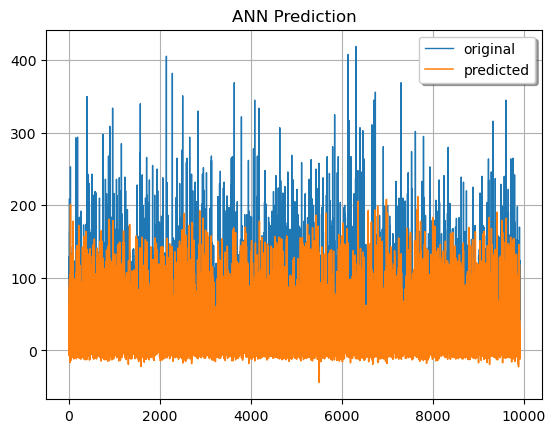

In [189]:
evaluate_metrics(y_test,X_test, model,'ANN Prediction')

In [ ]:
y_test.mean()

In [ ]:
test_pred.mean()

In [ ]:
(66.3356-63.1647)/66.3356